In [53]:
# Drop missing value rows using dropna() function
import pandas as pd
data = pd.read_csv('MedicalCentre.csv')
data.shape

(110527, 14)

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import model_selection
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

In [54]:
data.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62.0,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110524 non-null  float64
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(2), int64(7), object(5)
memory usage: 11.8+ MB


### 1. Prepare the data for downstream processes, e.g., deal with missing values, duplicates 	

### Missing values, duplicates 	

In [56]:
data.isnull().sum()

PatientID         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               3
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

In [57]:
# deal with missing values
data=data.dropna()
data.shape

(110524, 14)

## Duplicates 	

In [58]:
##delete the duplicate rows with same appointmentID. 
data=data.drop_duplicates(subset='AppointmentID', keep='first')
data.shape

(110524, 14)

In [59]:
##drop the patientID and AppointmentID
data=data.drop(['PatientID','AppointmentID'],axis=1,inplace=False)
data.shape

(110524, 12)

### 2.Determine the frequency of distinct values in each feature set

In [60]:
data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000,110524.000000
mean,37.088488,0.098268,0.197251,0.071867,0.030401,0.022249,0.321025
std,23.110271,0.297678,0.397925,0.258268,0.171688,0.161545,0.466873
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110524 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Gender          110524 non-null  object 
 1   ScheduledDay    110524 non-null  object 
 2   AppointmentDay  110524 non-null  object 
 3   Age             110524 non-null  float64
 4   Neighbourhood   110524 non-null  object 
 5   Scholarship     110524 non-null  int64  
 6   Hypertension    110524 non-null  int64  
 7   Diabetes        110524 non-null  int64  
 8   Alcoholism      110524 non-null  int64  
 9   Handicap        110524 non-null  int64  
 10  SMS_received    110524 non-null  int64  
 11  No-show         110524 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 11.0+ MB


### 3. Initialize a function to plot relevant features within the dataset to visualize for outliers

/Users/liuyichen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

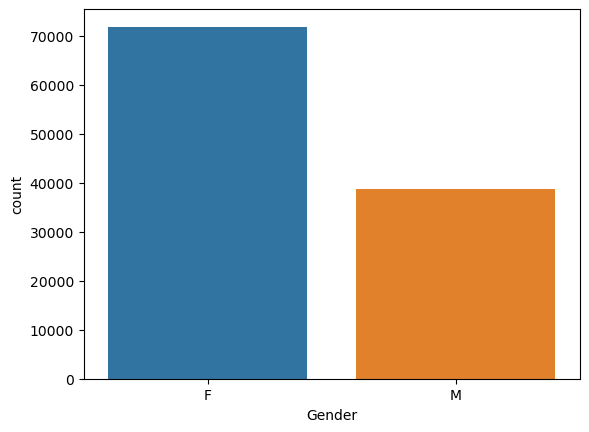

In [62]:
import matplotlib.pyplot as plt #to plot charts
import seaborn as sns #used for data visualization
sns.countplot('Gender',data=data)

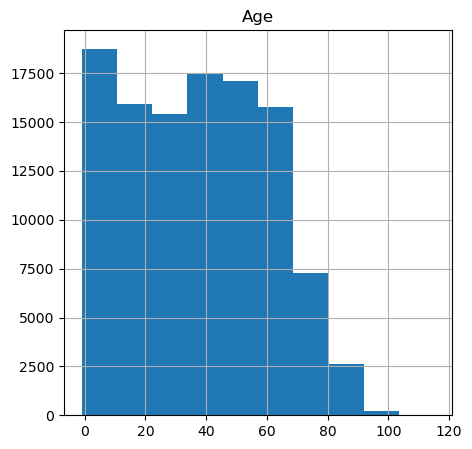

In [63]:
#histogram for each  feature
data.hist(column='Age',bins=10,figsize=(5,5))
plt.show()

<AxesSubplot:xlabel='Age'>

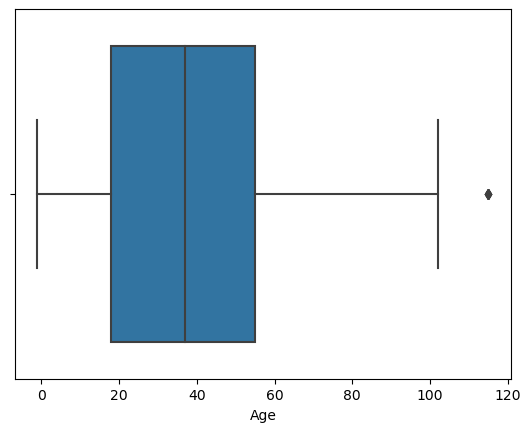

In [64]:
sns.boxplot(x='Age',data=data)
plt.subplot()

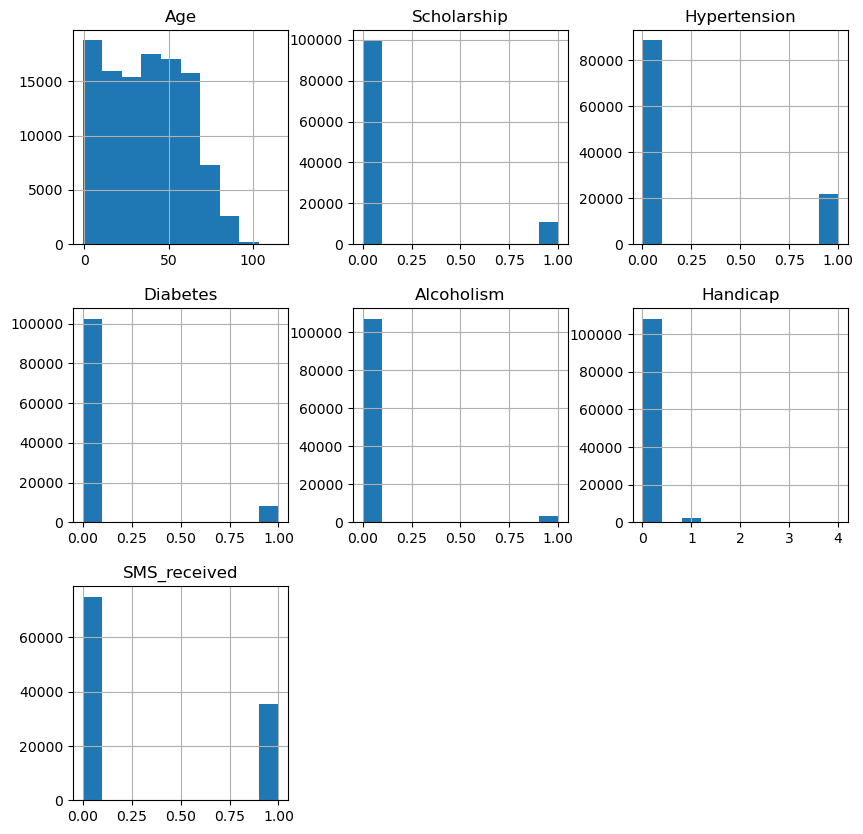

In [65]:
#histogram for each  feature
data.hist(bins=10,figsize=(10,10))
plt.show() 

### 4.  Count the frequency of negative Age feature observations, and remove them

In [66]:
data.Age.value_counts()

 0.0      3539
 1.0      2273
 52.0     1746
 49.0     1652
 53.0     1651
          ... 
 115.0       5
 100.0       4
 102.0       2
 99.0        1
-1.0         1
Name: Age, Length: 104, dtype: int64

In [67]:
## Filter age who under zero and delete. 
data[(data.Age <0)]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
99832,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1.0,ROMÃO,0,0,0,0,0,0,No


In [68]:
data=data.drop([99832],axis=0,inplace=False)

### 5.The values within AwaitingTime are negative, transform them into positive values

### 7.Separate the date features into date components

In [69]:
parse_dates=['ScheduledDay','AppointmentDay']

In [70]:
data.ScheduledDay=data.ScheduledDay.str.replace('T',' ')
data.ScheduledDay=data.ScheduledDay.str.replace('Z','')
data.ScheduledDay[0]

'2016-04-29 18:38:08'

In [71]:
data.AppointmentDay=data.AppointmentDay.str.replace('T',' ')
data.AppointmentDay=data.AppointmentDay.str.replace('Z','')
data.AppointmentDay[0]

'2016-04-29 00:00:00'

In [72]:
data.ScheduledDay=pd.to_datetime(data['ScheduledDay'], format='%Y-%m-%d %H:%M:%S')
data.AppointmentDay=pd.to_datetime(data['AppointmentDay'], format='%Y-%m-%d %H:%M:%S')
data.ScheduledDay[0]

Timestamp('2016-04-29 18:38:08')

In [73]:
data.ScheduledDay[42]-data.AppointmentDay[42]

Timedelta('-1 days +08:34:54')

In [74]:
data.dtypes

Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                      float64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No-show                   object
dtype: object

In [75]:
data['AwaitingTime']=data['ScheduledDay']-data['AppointmentDay']

In [76]:
data.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,AwaitingTime
count,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523.000000,110523
mean,37.088832,0.098269,0.197253,0.071867,0.030401,0.022249,0.321028,-10 days +06:51:03.135845028
std,23.110091,0.297680,0.397927,0.258269,0.171689,0.161546,0.466874,15 days 05:51:44.221428012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-179 days +10:40:59
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15 days +16:18:17.500000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4 days +12:37:12
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0 days 08:18:28
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6 days 13:49:20


In [77]:
data['AwaitingTime'] < '%0-%0-%0 %0:%0:%0'

TypeError: Invalid comparison between dtype=timedelta64[ns] and str

### 6. ML algorithm requires the variables to be coded into its equivalent integer codes. Encode the string categorical values into an integer code

In [ ]:
data.dtypes

In [ ]:
import numpy as np
data['Age'] = data['Age'].apply(np.int64)

In [ ]:
data['Gender'].replace('F', 0,inplace=True)
data['Gender'].replace('M', 1,inplace=True)
data['Gender'] = data['Gender'].apply(np.int64)
data.dtypes

In [ ]:
data['No-show'].replace('No', 0,inplace=True)
data['No-show'].replace('Yes', 1,inplace=True)
data['No-show'] = data['No-show'].apply(np.int64)
data.dtypes

In [ ]:
data.dtypes

### 8.ML algorithms work best when the input data are scaled to a narrow range around zero. Rescale the age feature with a normalizing (e.g., min_max normalization) or standardization (e.g., z_score standardization) function.

### (1)normalization ( min_max normalization)

In [ ]:
data.Age=(data.Age-data.Age.min())/(data.Age.max()-data.Age.min())

### (2)standardization (e.g., z_score standardization)

In [ ]:
# Z-Score using pandas
(data.Age - data.Age.mean()) / data.Age.std()

In [ ]:
data.describe()

### 9 Conduct variability comparison between features using a correlation matrix & drop correlated features

In [ ]:
corr_matrix = data.corr()
corr_matrix

In [ ]:
sns.heatmap(corr_matrix, annot=True)

In [ ]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k =1).astype(np.bool))
print(upper_tri)

In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

# B. Model Development : Naïve Bayes classifier

In [79]:
#Splitting the dataset into training and testing variables
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
##tread the Hypertension as target, and 'Age','Scholarship','Diabetes','Alcoholism','Handicap'as data.

In [80]:
X=data[['Age','Scholarship','Diabetes','Alcoholism','Handicap']]
y=data['Hypertension']

In [163]:
#create the train and test sets. keeping 70% as training data and 30% as testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=20)
X_train.shape,y_train.shape

((77366, 5), (77366,))

In [164]:
X_test.shape,y_test.shape

((33157, 5), (33157,))

In [165]:
#train the modrl
naive_bayes = GaussianNB()

#Fitting the data to the classifier
naive_bayes.fit(X_train , y_train)
 
#Predict on test data
y_predicted = naive_bayes.predict(X_test)

In [149]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     26602
           1       0.64      0.37      0.47      6555

    accuracy                           0.83     33157
   macro avg       0.75      0.66      0.69     33157
weighted avg       0.82      0.83      0.82     33157



# C. Model Evaluation & Comparison

### 1.Write a Function to detect the model’s Accuracy by applying the trained model on a testing datasetto find the predicted labels of Status. Was there overfitting?

#### Evaluating a Classification Model Performance
Accuracy

Precision-Recall

F1-score

ROC & Area under the curve (AUC)


In [148]:
from sklearn import metrics
print("Accuracy :", metrics.accuracy_score(y, naive_bayes.predict(X)))

Accuracy : 0.8346588492892882


In [142]:
print("AUC :", metrics.roc_auc_score(y, naive_bayes.predict_proba(X)[:,1]))

AUC : 0.8771988599802955


#### Write a Function to  detect the model’s Accuracy by applying the trained model on a testing dataset to find the predicted labels of Status.

In [138]:
print("Confusion matrix :\n",metrics.confusion_matrix(y, naive_bayes.predict(X)))
print("classification report :\n", metrics.classification_report(y, naive_bayes.predict(X)))

Confusion matrix :
 [[84111  4611]
 [13663  8138]]
classification report :
               precision    recall  f1-score   support

           0       0.86      0.95      0.90     88722
           1       0.64      0.37      0.47     21801

    accuracy                           0.83    110523
   macro avg       0.75      0.66      0.69    110523
weighted avg       0.82      0.83      0.82    110523



In [167]:
metrics.accuracy_score(naive_bayes.predict (X_train), y_train)

0.8345267947160251

In [168]:
metrics.accuracy_score(naive_bayes.predict (X_test), y_test)

0.8349669752993335

### The training accuracy is very close to the testing accuracy. Althougt the Accuracy is 0.83 both in training and testing, it is not too high, the predition is good fit

In [151]:
fpr, tpr, _ = metrics.roc_curve(y, naive_bayes.predict_proba(X)[:,1])

In [155]:
roc_auc = metrics.auc(fpr, tpr)
print('ROC AUC: %0.3f' % roc_auc) 

ROC AUC: 0.877


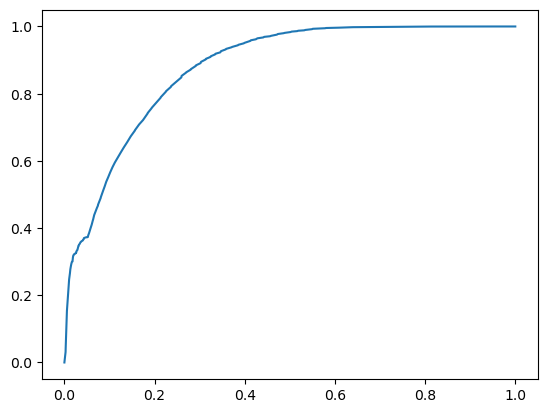

In [156]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)

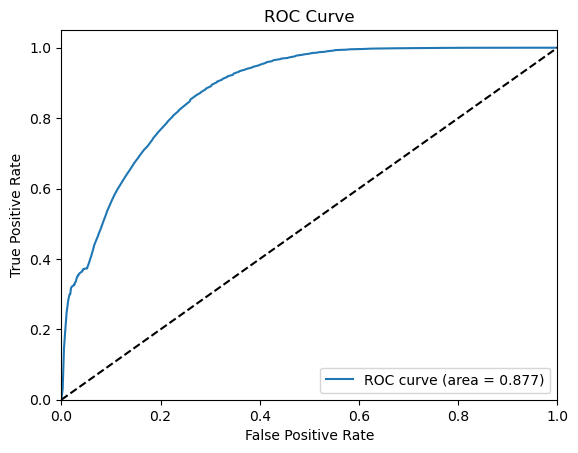

In [161]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

### The ROC graph summarizes all of the confusion matrices that each threshold produced. The AUC is 0.877. 

### 2.Tune the model using GridSearchCV


In [ ]:
#Hyperparameters: Meta parameters associated with any ML algorithm,
#usually set before model training & building process